In [17]:
!pip install pystemmer
import os
import re
import wordcloud as  WorldCloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)
import Stemmer
from sklearn.feature_extraction.text import CountVectorizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 6.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pystemmer: filename=PyStemmer-2.2.0.1-cp310-cp310-linux_x86_64.whl size=226048 sha256=33a2a4b04163d55f2ae275bbce15773600a0c827c2b494ab764bce320866c44d
  Stored in directory: /root/.cache/pip/wheels/45/7d/2c/a7ebb8319e01acc5306fa1f8558bf24063d6cec2c02de330c9
Successfully built pystemmer


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read the data

In [18]:
path_names=os.listdir("/kaggle/input/hespress")

In [19]:
df=pd.DataFrame()
for data_csv in path_names :
    if data_csv.startswith('stories_'):
        df=df.append(pd.read_csv("/kaggle/input/hespress/"+data_csv))
        


/tmp/ipykernel_32/594145410.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_32/594145410.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_32/594145410.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_32/594145410.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_32/594145410.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_32/594145410.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [20]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers


In [21]:
def describe(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11000 non-null  int64 
 1   id          11000 non-null  object
 2   title       11000 non-null  object
 3   date        11000 non-null  object
 4   author      11000 non-null  object
 5   story       11000 non-null  object
 6   topic       11000 non-null  object
dtypes: int64(1), object(6)
memory usage: 687.5+ KB


In [23]:
df.isnull().sum()

Unnamed: 0    0
id            0
title         0
date          0
author        0
story         0
topic         0
dtype: int64

In [24]:
print(f"number of examples is: {len(df)}")

number of examples is: 11000


# Remove unnecessary columns

In [25]:
df.drop(["Unnamed: 0","id","title","date","author"], axis=1,inplace=True)

In [26]:
df.head()

,story,topic
0,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers


# Pre-Proccessing

## First look about top 100 freq words

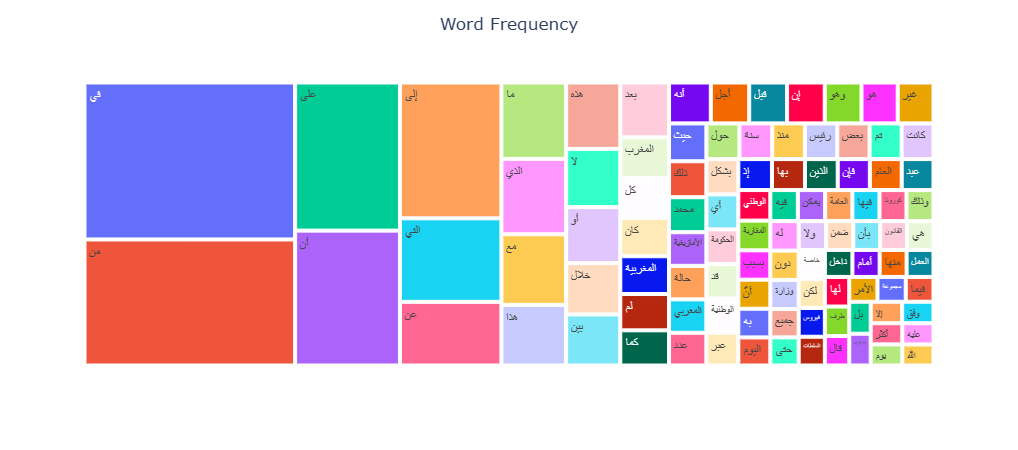

In [27]:
freq_words=df["story"].str.split(expand=True).stack().value_counts()
top_100_freq_words=freq_words[:100]

fig=px.treemap(top_100_freq_words,path=[top_100_freq_words.index],values=0)
fig.update_layout(title="Word Frequency",title_x=0.5)
fig.show()

## we compare this figure after pre-processing

## as it classification problem we can pre-process the text by removing stop words, normalizing words, etc.. any sutitable pre-process methods for this case


In [29]:
stop_words =['من',
 'في',
 'على',
 'و',
 'فى',
 'يا',
 'عن',
 'مع',
 'ان',
 'هو',
 'علي',
 'ما',
 'اللي',
 'كل',
 'بعد',
 'ده',
 'اليوم',
 'أن',
 'يوم',
 'انا',
 'إلى',
 'كان',
 'ايه',
 'اللى',
 'الى',
 'دي',
 'بين',
 'انت',
 'أنا',
 'حتى',
 'لما',
 'فيه',
 'هذا',
 'واحد',
 'احنا',
 'اي',
 'كده',
 'إن',
 'او',
 'أو',
 'عليه',
 'ف',
 'دى',
 'مين',
 'الي',
 'كانت',
 'أمام',
 'زي',
 'يكون',
 'خلال',
 'ع',
 'كنت',
 'هي',
 'فيها',
 'عند',
 'التي',
 'الذي',
 'قال',
 'هذه',
 'قد',
 'انه',
 'ريتويت',
 'بعض',
 'أول',
 'ايه',
 'الان',
 'أي',
 'منذ',
 'عليها',
 'له',
 'ال',
 'تم',
 'ب',
 'دة',
 'عليك',
 'اى',
 'كلها',
 'اللتى',
 'هى',
 'دا',
 'انك',
 'وهو',
 'ومن',
 'منك',
 'نحن',
 'زى',
 'أنت',
 'انهم',
 'معانا',
 'حتي',
 'وانا',
 'عنه',
 'إلي',
 'ونحن',
 'وانت',
 'منكم',
 'وان',
 'معاهم',
 'معايا',
 'وأنا',
 'عنها',
 'إنه',
 'اني',
 'معك',
 'اننا',
 'فيهم',
 'د',
 'انتا',
 'عنك',
 'وهى',
 'معا',
 'آن',
 'انتي',
 'وأنت',
 'وإن',
 'ومع',
 'وعن',
 'معاكم',
 'معاكو',
 'معاها',
 'وعليه',
 'وانتم',
 'وانتي',
 '¿',
 '|']

In [30]:
def remove_stop_words(text):
    '''
    Argument:
        string of words
    return:
        string of words but without stop words
    '''
    return " ".join(word for word in text.split() if word not in stop_words)

In [31]:
def normalize(sentence):
    '''
    Argument:
        string of words
    return:
        string of words but standardize the words
    '''
    sentence = re.sub("[إأآا]", "ا", sentence)
    sentence = re.sub("ى", "ي", sentence)
    sentence = re.sub("ؤ", "ء", sentence)
    sentence = re.sub("ئ", "ء", sentence)
    sentence = re.sub("ة", "ه", sentence)
    sentence = re.sub("گ", "ك", sentence)
    return sentence

In [32]:
def pre_process_text(text):
    '''
    Argument:
        string of words
    return:
        string of cleaned words 
    '''
    st =  Stemmer.Stemmer('arabic')
    text = text.replace("#", " "); 
    text = text.replace("@", " ");
    text = text.replace("_", " ");
    text = text.replace('"', ' '); 
    text = text.replace('،', ' ');
    text = re.sub(r'\s+', ' ', text) # This line replaces one or more consecutive whitespace characters (\s+) with a single space. It effectively condenses multiple spaces, tabs, or line breaks into a single space.
    text=remove_stop_words(text)
    text=normalize(text)
    text= " ".join([st.stemWord(i) for i in text.split()])
    return text

In [33]:
pre_process_texts=[pre_process_text(text) for text in df["story"]]
df["story"]=pre_process_texts

# Data Analysis

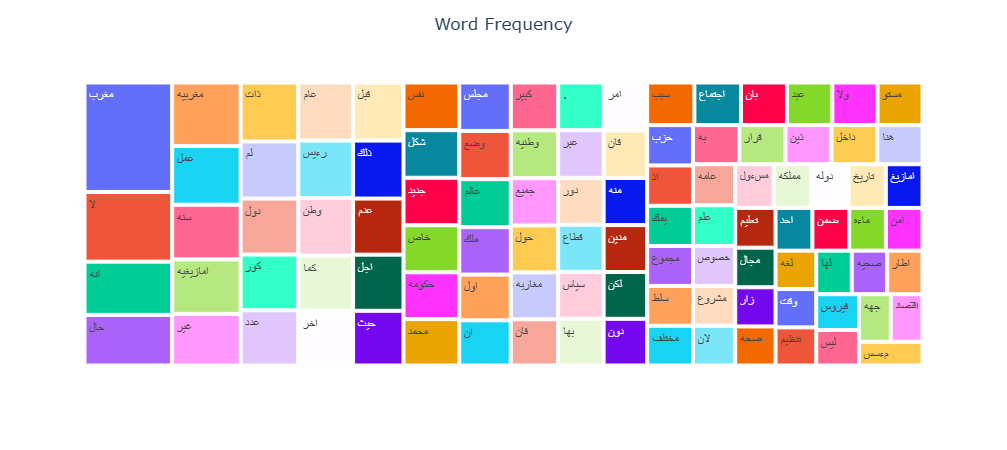

In [34]:
freq_words=df["story"].str.split(expand=True).stack().value_counts()
top_100_freq_words=freq_words[:100]

fig=px.treemap(top_100_freq_words,path=[top_100_freq_words.index],values=0)
fig.update_layout(title="Word Frequency",title_x=0.5)
fig.show()

## so the words are different after cleaning the texts, 
##noted that methods in data preprocessing like stop_words or stemming may not be suitable for other use cases

### Distribution of words 

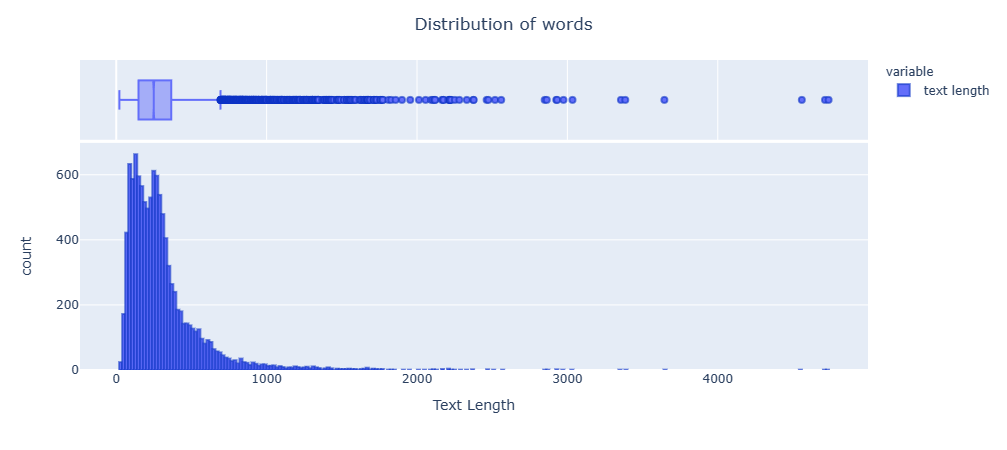

In [35]:
df["text length"]=[len(t.split(" ")) for t in df["story"]]
fig=px.histogram(df["text length"],marginal='box',labels={"value" :"Text Length"})
fig.update_traces(marker=dict(line=dict(color='rgba(12, 50, 196, 0.6)',width=2)))
fig.update_layout(title_text="Distribution of words",title_x=0.5)

## so from that the Distribution is right skewed and there are outliers and the text lengths avearge are in 249  

### Distribution of topics `

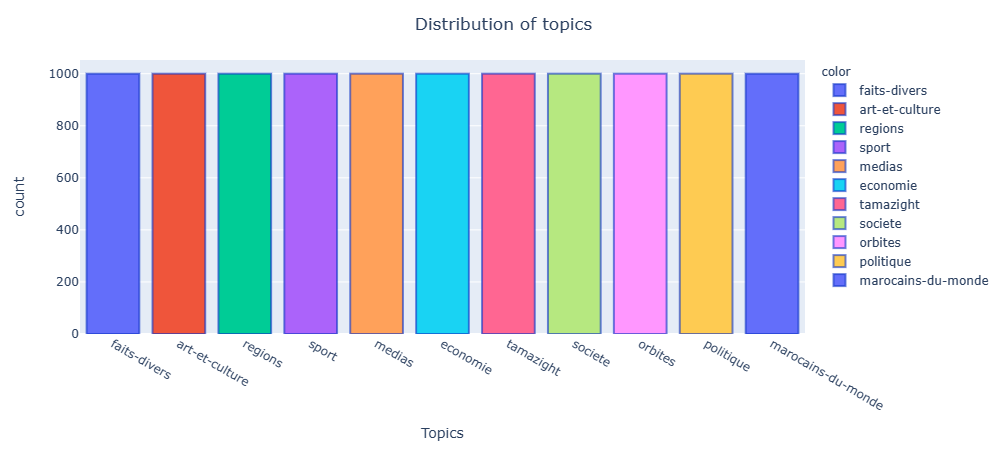

In [36]:
fig=px.histogram(df["topic"],labels={"value" :"Topics"},color=df["topic"])
fig.update_traces(marker=dict(line=dict(color='rgba(12, 50, 196, 0.6)',width=2)))
fig.update_layout(title_text="Distribution of topics",title_x=0.5)

## from that we know that the data is balanced and no need for data augmentation, but in future we can need to increase the dataset itself

## Distribution of N-Gram

In [40]:
def get_top_n_words(texts,n,n_gram):
    doc=CountVectorizer(ngram_range=(n_gram,n_gram)).fit(texts)  # convert a collection of text documents into a matrix of token counts (word frequencies).
    bow=doc.transform(texts) # transform the input dataset into a bag-of-words (BOW) representation. The BOW matrix will have rows representing each document in input dataset and columns corresponding to the unique words present in the dataset.
    sum_words=bow.sum(axis=0) #  calculates the sum of word occurrences across all documents in the BOW matrix
    word_freq=[(word,sum_words[0,idx]) for word,idx in doc.vocabulary_.items()] # know the word and its occurrences
    word_freq=sorted(word_freq,key =lambda x:x[1],reverse=True) ##sort them in descending order
    return word_freq[:n]


## Unigram

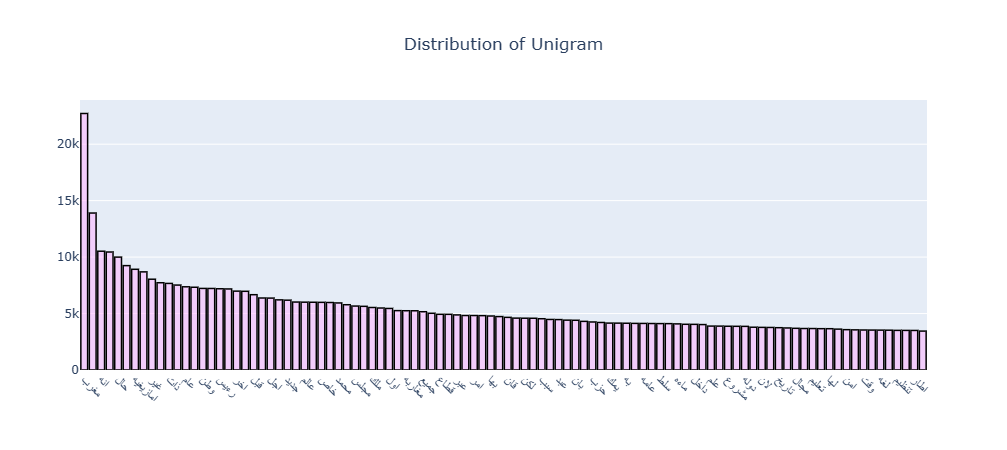

In [42]:
words=get_top_n_words(df["story"],100,1)
df_gram=pd.DataFrame(words,columns=["Bigram","Count"])
data = go.Bar(
                x = df_gram["Bigram"],
                y = df_gram["Count"],
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
fig = go.Figure(data = data)
fig.update_xaxes(tickangle= 45)
fig.update_layout(title_text="Distribution of Unigram",title_x=0.5)
iplot(fig)

## now we see the top 100 words unigram distribution

## Bigram

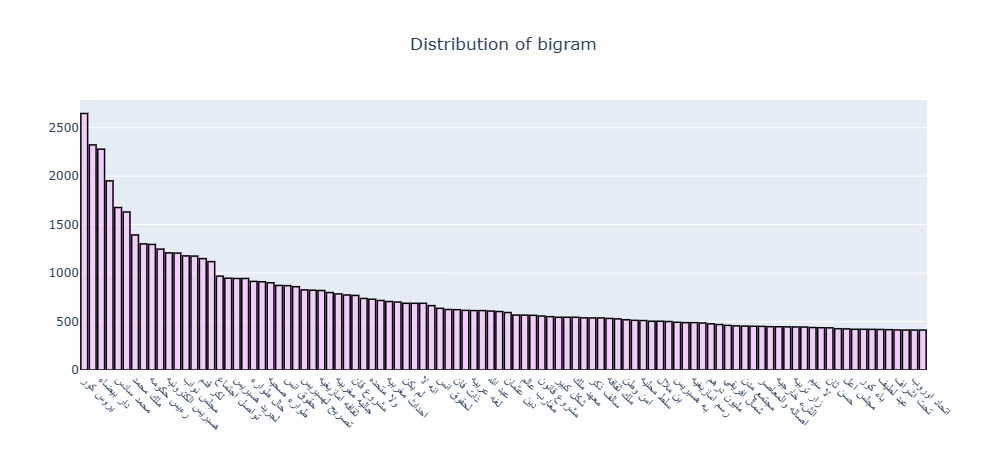

In [43]:
words=get_top_n_words(df["story"],100,2)
df_gram=pd.DataFrame(words,columns=["Bigram","Count"])
data = go.Bar(
                x = df_gram["Bigram"],
                y = df_gram["Count"],
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
fig = go.Figure(data = data)
fig.update_xaxes(tickangle= 45)
fig.update_layout(title_text="Distribution of bigram",title_x=0.5)

iplot(fig)
## now we see the top 100 words bigram distribution

## Trigram

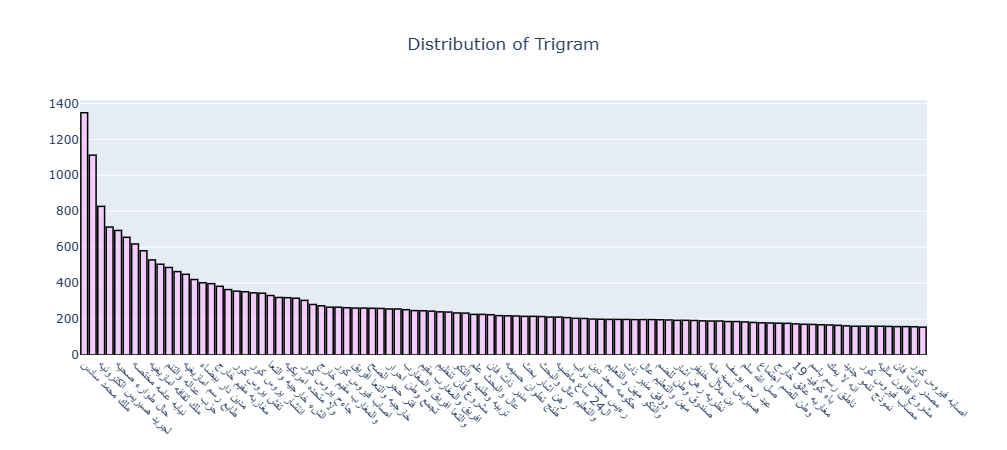

In [44]:
words=get_top_n_words(df["story"],100,3)
df_gram=pd.DataFrame(words,columns=["Bigram","Count"])
data = go.Bar(
                x = df_gram["Bigram"],
                y = df_gram["Count"],
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
fig = go.Figure(data = data)
fig.update_xaxes(tickangle= 45)
fig.update_layout(title_text="Distribution of Trigram",title_x=0.5)

iplot(fig)
## now we see the top 100 words Trigram distribution

# Save Dataset

In [264]:
df.to_csv("task2.csv",index=False)